<a href="https://colab.research.google.com/github/disenodc/Materia-de-aprendizaje/blob/master/TP0_ANSCOMBE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANSCOMBE QUARTET
Ejercicio 0 de Aprendizaje de maquina

En principio este ejercicio muestra como conjuntos de datos con propiedades estadísticas similares pueden de hecho ser muy diferentes entre sí.

In [1]:
import pandas as pd # libreria manipulacion de datos
import seaborn as sns # Libreria graficas
import numpy as np

In [2]:
ndata = 

df = pd.DataFrame(ndata)


print(ndata)

[[16, 8], [8, 6], [16, 10], [16, 6]]


In [3]:
#Cargo los datos

anscombe = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/anscombe.csv')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


# Verificar los parametros del dataset

In [4]:
# Calcular los valores de la media y la varianza de cada dataset

agg = anscombe.groupby('dataset').agg([np.mean, np.var])
agg

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [5]:
# Calcular la correlacion
corr = [g.corr()['x'][1] for _, g in anscombe.groupby('dataset')]
corr


[0.8164205163448399,
 0.8162365060002427,
 0.8162867394895984,
 0.8165214368885028]

# Graficar los datasets, haciendo un scatterplot y una regresion lineal

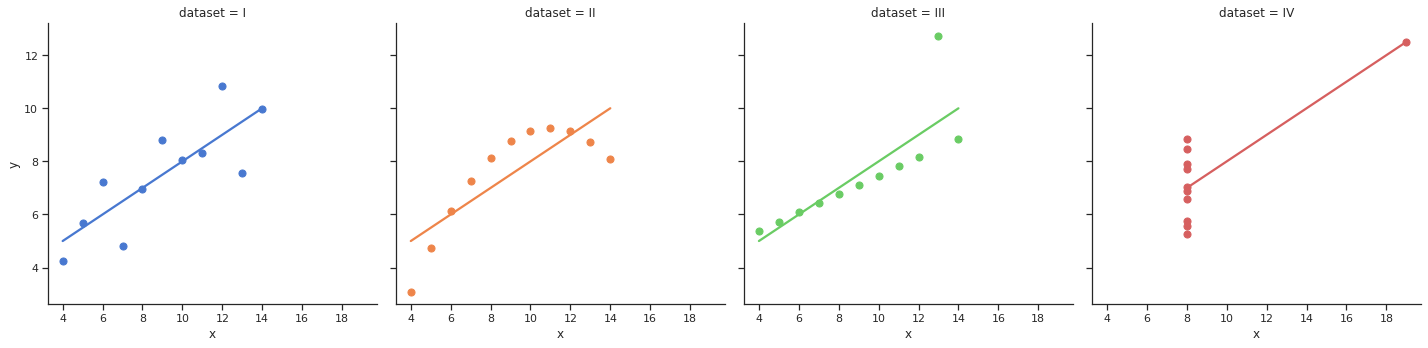

In [11]:
# Grafica Usando seaborn
sns.set(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
               col_wrap=4, ci=None, palette="muted", height=5,
               scatter_kws={"s": 50, "alpha": 1});

In [12]:
# Calculo de los valores de la regresion lineal
fits = [np.polyfit(g['x'], g['y'], 1) for _, g in anscombe.groupby('dataset')]


In [13]:
# Almacenar los valores calculados de las regresiones lineales en un dataframe
val_reg = pd.DataFrame(fits,columns=['pendiente','intercepto'],index='I II II IV'.split())
val_reg.index.names = ['dataset']
val_reg


,pendiente,intercepto
dataset,,
I,0.500091,3.000091
II,0.500000,3.000909
II,0.499727,3.002455
IV,0.499909,3.001727


En la visualizacion de datos se puede identificar que los nuevos datos ([16,8],
[8,6],[16,10],[16,6]) en orden a los valores visualizados calculados sobre la linea de regresion y su progresión, que corresponderian el valor [16,8] al dataset I, el valor [8,6] al dataset IV, el valor [16,10] al dataset III y el valor [16,6] al dataset II. 